Jason
<br>
2401960183
<br>
Deep Learning - No 2

Import Libraries Needed :
- Numpy
- Pandas
- Tensorflow
- Keras
- Sklearn Metrics
- Matplotlib
- OpenCV

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import cv2
import os
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<h2>2a. Hyperparameters Initialization and data augmentation</h2>

Initialize path for train and test directory. Target size for the image size, and target_dims for the dimension of the image. It has a z value of 3 to occupy the rgb values for each image. N = 26 is for the class label, total of alphabets from A - Z.

In [2]:
train_dir = "./ALS/asl_alphabet_train/asl_alphabet_train"
test_dir = "./ALS/asl_alphabet_test/asl_alphabet_test"

target_size = (64, 64)
target_dims = (64, 64, 3)
n = 26
batch_size = 64

class_labels = sorted(os.listdir(train_dir))    

Print all the class labels provided on the train dataset

In [3]:
class_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

Function to load train images and labels. Iterate on each directory and files containing their corresponding label/class. Read each images on size 64x64.

In [4]:
def load_images(directory):
    images = []
    labels = []
    for idx, label in enumerate(class_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), target_size)
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

Folder/directory structure for test images is a bit different since it doesn't have a folder named after it's label. Therefore iterating for each files and checking their label on file name and giving it label corresponding to each class.

In [5]:
def load_images_test(directory):
    images = []
    labels = []
    
    for image_file_name in os.listdir(directory):
        label = -1
        if image_file_name.startswith("A"):
            label = 0
        elif image_file_name.startswith("B"):
            label = 1
        elif image_file_name.startswith('C'):
            label = 2
        elif image_file_name.startswith('D'):
            label = 3
        elif image_file_name.startswith('E'):
            label = 4
        elif image_file_name.startswith('F'):
            label = 5
        elif image_file_name.startswith('G'):
            label = 6
        elif image_file_name.startswith('H'):
            label = 7
        elif image_file_name.startswith('I'):
            label = 8
        elif image_file_name.startswith('J'):
            label = 9
        elif image_file_name.startswith('K'):
            label = 10
        elif image_file_name.startswith('L'):
            label = 11
        elif image_file_name.startswith('M'):
            label = 12
        elif image_file_name.startswith('N'):
            label = 13
        elif image_file_name.startswith('O'):
            label = 14
        elif image_file_name.startswith('P'):
            label = 15
        elif image_file_name.startswith('Q'):
            label = 16
        elif image_file_name.startswith('R'):
            label = 17
        elif image_file_name.startswith('S'):
            label = 18
        elif image_file_name.startswith('T'):
            label = 19
        elif image_file_name.startswith('U'):
            label = 20
        elif image_file_name.startswith('V'):
            label = 21
        elif image_file_name.startswith('W'):
            label = 22
        elif image_file_name.startswith('X'):
            label = 23
        elif image_file_name.startswith('Y'):
            label = 24
        elif image_file_name.startswith('Z'):
            label = 25
        else:
            continue
        
        filepath = directory + "/" + image_file_name
        
        image = cv2.resize(cv2.imread(filepath), target_size)
        images.append(image)
        labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

Load train images and also their class label values

In [6]:
images, labels = load_images(train_dir)
print(images.shape, labels.shape)

(26000, 64, 64, 3) (26000,)


Load test images and also their class label values

In [7]:
images_test, labels_test = load_images_test(test_dir)
print(images_test.shape, labels_test.shape)

(26, 64, 64, 3) (26,)


Initialize X_train from the train images and y_train from the train class labels

In [8]:
X_train = images
y_train = labels

Initialize X_test from the test images and y_test from the test class labels

In [9]:
X_test = images_test
y_test = labels_test

Use keras.utils.to_categorical function to one hot encode the y class from shape (None, 1) to (None, 26)

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

Split the train dataset into train and validation set, which train having 80% and validation having 20% of the real train set.

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,random_state=30)

<h2>2c. Baseline Architecture of the CNN Model</h2>

Initialize CNN Model using Keras Sequential Model following the architecture showed on the case. Firstly adding Conv2D, Activation, MaxPooling2D with 64 total nodes, input = (64,64, 3), and kernel size of 5, 5. Followed by adding Conv2D, Activation, MaxPooling2D with 128 total nodes, and kernel size of 3, 3 which will make the output of the layer N/2. Also followed by adding Conv2D, Activation, MaxPooling2D with 256 total nodes, and kernel size of 3, 3 which will make the output of the layer N/2. Lastly add Flatten Layer, Dense with total nodes of 512, and last layer of dense with n_class (26) of output

In [12]:
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=target_dims))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(n, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 64)        4864      
                                                                 
 activation (Activation)     (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                    

Compile the model using ADAM Optimizer. Loss function is categorical cross entropy because we are dealing with categorying over 2 classes.

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

Fit the train dataset and validation data to the model.

In [14]:
model.fit(X_train, y_train,
          epochs=5,
          batch_size=batch_size,
          validation_data=(X_val, y_val))

Epoch 1/5
325/325 [==============================] - 133s 408ms/step - loss: 1.7639 - accuracy: 0.8010 - val_loss: 0.1061 - val_accuracy: 0.9633
Epoch 2/5
325/325 [==============================] - 127s 391ms/step - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0277 - val_accuracy: 0.9927
Epoch 3/5
325/325 [==============================] - 132s 406ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0123 - val_accuracy: 0.9977
Epoch 4/5
325/325 [==============================] - 133s 411ms/step - loss: 0.0452 - accuracy: 0.9882 - val_loss: 0.0742 - val_accuracy: 0.9800
Epoch 5/5
325/325 [==============================] - 130s 401ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0045 - val_accuracy: 0.9992


<h2>2e. CNN Model Perfomance Analysis</h2>


Evaluate the model validation and test accuracy by using evaluate function on Sequential model by giving validation and test datasets. Here we received a very good results on the validation images about 99 % and 100 % on test images. Test images may have received a 100% because of the small sets of data in the test data set.

In [15]:
score = model.evaluate(x = X_val, y = y_val, verbose = 0)
print('Accuracy for validation images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for validation images: 99.923 %
Accuracy for test images: 100.0 %


Using sklearn utils shuffle function to shuffle the test images and labels before predicting to variate the orders of predictions.

In [16]:
from sklearn.utils import shuffle
shuffled_images_test, shuffled_labels_test = shuffle(images_test, labels_test)

Get the class label from integered class number label. Ex : From 1 to 'A' , 2 to 'B', etc. Using predict function on model and give a threshold about 0.7 for prediction over than 0.7 to be the class label. The predicted_labels are now in hot encoded mode meaning not the real number values, so np.argmax() to get the real number value. Lastly plot the shuffled images, prediction, and actual class value.

1/1 [==============================] - 0s 130ms/step


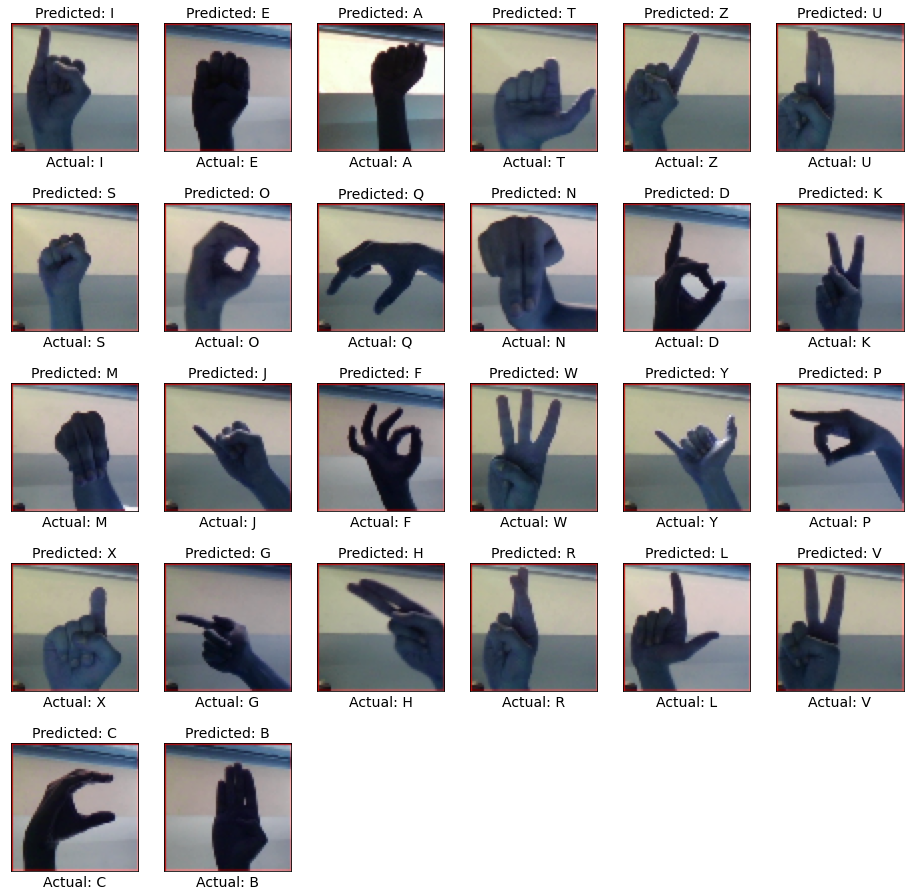

In [17]:
def get_label(num):
    return class_labels[num]

predicted_labels = (model.predict(shuffled_images_test) >= 0.7).astype('int64')
predicted_labels = np.argmax(predicted_labels, axis=1)

row = 5
col = 6
fig, axes = plt.subplots(row, col, figsize=(16, 16))
c = 0

for i in range(row):
    for j in range(col):
        if(c >= 26):
            axes[i][j].set_axis_off()
        else:
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].imshow(shuffled_images_test[c])
            axes[i][j].set_title(f'Predicted: {get_label(predicted_labels[c])}', fontsize=14)
            axes[i][j].set_xlabel(f'Actual: {get_label(shuffled_labels_test[c])}', fontsize=14)
        c += 1

<h2>2d. Architecture Tuning and hyperparameter tuning</h2>

To tune the model architecture, we will add a BatchNormalization layer on the last MaxPooling layer. Instead of doing the normalizing in the raw data, batch normalization is done between the layers of a neural network. Instead of using the entire data set, it is done in mini-batches. It facilitates learning by accelerating training and utilizing higher learning rates. Also adding a Dropout layer to reduce overfitting and improve generalization error in the CNN model.

In [18]:
model_2 = Sequential()

model_2.add(Conv2D(64, (5, 5), input_shape=target_dims))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(128, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D((2, 2)))

model_2.add(Conv2D(256, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D((2, 2)))

model.add(BatchNormalization())

model_2.add(Flatten())

model.add(Dropout(0.5))

model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(n, activation='softmax'))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        4864      
                                                                 
 activation_3 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 activation_4 (Activation)   (None, 28, 28, 128)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                  

Compile the model using ADAM Optimizer. Loss function is categorical cross entropy because we are dealing with categorying over 2 classes.

In [19]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

Fit the train dataset and validation data to the model.

In [20]:
model_2.fit(X_train, y_train,
          epochs=5,
          batch_size=batch_size,
          validation_data=(X_val, y_val))

Epoch 1/5
325/325 [==============================] - 125s 384ms/step - loss: 1.7476 - accuracy: 0.7986 - val_loss: 0.0792 - val_accuracy: 0.9688
Epoch 2/5
325/325 [==============================] - 135s 416ms/step - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 3/5
325/325 [==============================] - 136s 420ms/step - loss: 0.0284 - accuracy: 0.9924 - val_loss: 0.0107 - val_accuracy: 0.9969
Epoch 4/5
325/325 [==============================] - 132s 405ms/step - loss: 0.0413 - accuracy: 0.9894 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 5/5
325/325 [==============================] - 126s 386ms/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.0094 - val_accuracy: 0.9983


<h2>2e. Tuned CNN Model Perfomance Analysis</h2>


Evaluate the tuned model

In [21]:
score = model_2.evaluate(x = X_val, y = y_val, verbose = 0)
print('Accuracy for validation images:', round(score[1]*100, 3), '%')
score = model_2.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')

Accuracy for validation images: 99.827 %
Accuracy for test images: 100.0 %


Using sklearn utils shuffle function to shuffle the test images and labels before predicting to variate the orders of predictions.

In [22]:
shuffled_images_test, shuffled_labels_test = shuffle(images_test, labels_test)

Get the class label from integered class number label. Ex : From 1 to 'A' , 2 to 'B', etc. Using predict function on model and give a threshold about 0.7 for prediction over than 0.7 to be the class label. The predicted_labels are now in hot encoded mode meaning not the real number values, so np.argmax() to get the real number value. Lastly plot the shuffled images, prediction, and actual class value.

1/1 [==============================] - 0s 52ms/step


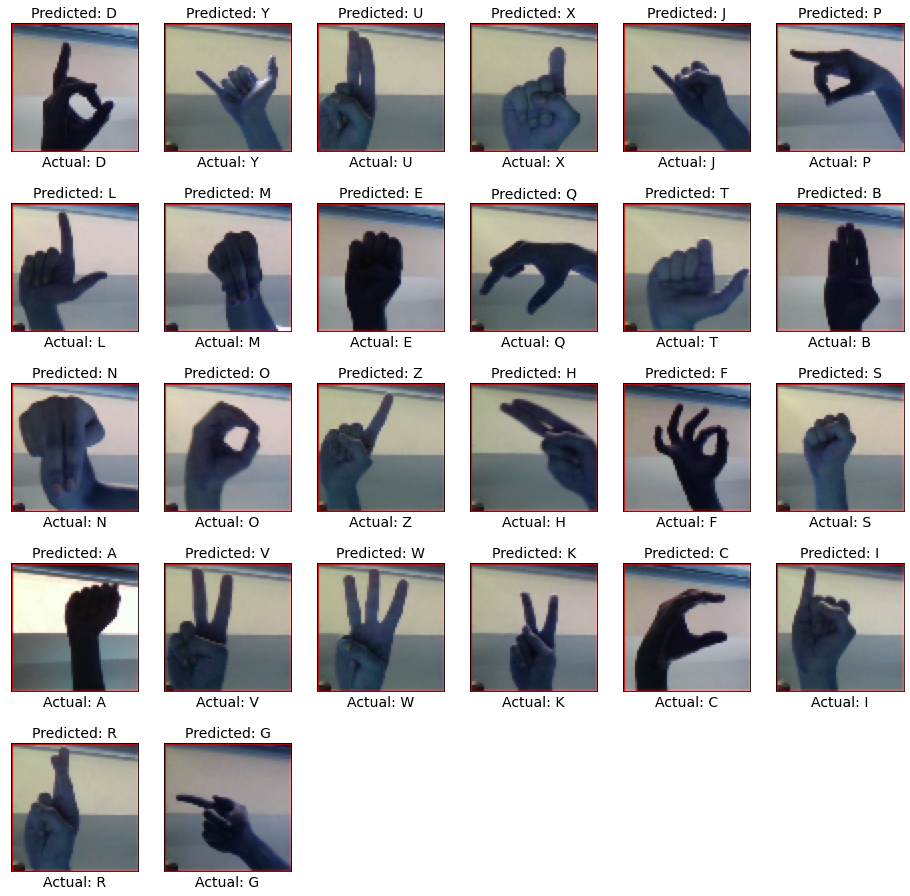

In [24]:
def get_label(num):
    return class_labels[num]

predicted_labels = (model_2.predict(shuffled_images_test) >= 0.7).astype('int64')
predicted_labels = np.argmax(predicted_labels, axis=1)

row = 5
col = 6
fig, axes = plt.subplots(row, col, figsize=(16, 16))
c = 0

for i in range(row):
    for j in range(col):
        if(c >= 26):
            axes[i][j].set_axis_off()
        else:
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].imshow(shuffled_images_test[c])
            axes[i][j].set_title(f'Predicted: {get_label(predicted_labels[c])}', fontsize=14)
            axes[i][j].set_xlabel(f'Actual: {get_label(shuffled_labels_test[c])}', fontsize=14)
        c += 1